In [1]:
from swarms import SizeDistribution
from swarms import CollSwarm
from numpy import linspace, zeros, logspace
import matplotlib.pyplot as plt

# Jupiter: An Example

For the following plots, the specifications of Jupiter will be used to demonstrate the different possible plots that swarms.py can produce. 

In [3]:
Dmin = 12e-6; Dmax = 15e4; M_init = 7.37307e19

jupiter = SizeDistribution(Dmin, Dmax, M0=M_init)

In [5]:
initial_swarm_mass = jupiter.Mtot()
initial_swarm_area = jupiter.Atot()
print("Swarm mass = {0:.5e} kg".format(initial_swarm_mass))
print("Swarm area = {0:.5e} m^2".format(initial_swarm_area))

Swarm mass = 7.39324e+19 kg
Swarm area = 9.18122e+16 m^2


## Area Plot

One can plot the total surface area of a swarm over time by repeatedly updating the swarm for every needed time step and record the specific area at that time. There is the option to specify a dynamic maximum object size that would decrease over time as specified in Kennedy 2010.

In [4]:
M0 = 7.37307e19; Dt = 100.; Dmax = 150000.; L_s = 3.828e26;
M_s = 1.989e30; M_pl = 1.89587112e27; a_pl = 7.7792e11
R_pl = 6.9911e7; eta = 0.4; Nstr = 6.; d_pl = a_pl

jupiter_correct = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=True)
jupiter_no_correct = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=False)

In [5]:
time = linspace(0, 1e10, 50000)
area_correct = zeros(50000)
area_no_correct = zeros(50000)

for i in range(len(time)):
    a = jupiter_correct.computeAtot()*4.4683677582981e-23 # change units into AU
    b = jupiter_no_correct.computeAtot()*4.4683677582981e-23 # change units into AU
    area_correct[i] = a
    area_no_correct[i] = b
    jupiter_correct.updateSwarm(time[i])
    jupiter_no_correct.updateSwarm(time[i])

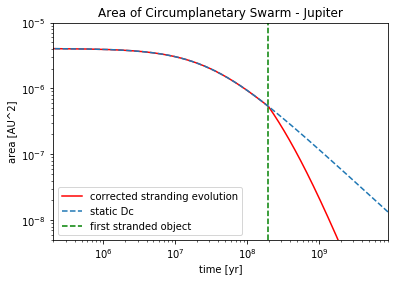

In [6]:
plt.loglog(time, area_correct, 'r', label="corrected stranding evolution")
plt.loglog(time, area_no_correct, ls='--', label="static Dc")
plt.axvline(jupiter_correct.tnleft, color='g', ls='--', label="first stranded object")
plt.xlabel("time [yr]")
plt.ylabel("area [AU^2]")
plt.title("Area of Circumplanetary Swarm - Jupiter")
plt.legend()
plt.xlim([2e5, 9e9])
plt.ylim([5e-9, 1e-5])
plt.show()

## Number Density Plot

Since it is possible to compute the number of objects in the swarm at any time with our code, an other possible plot that can be made is a size-distribution plot for logarithmic spaced times. 

In [8]:
jupiter_num = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=True)

In [9]:
drange = linspace(0.1, 250000, 5000)
time_log = logspace(0, 10, 20)
num_distribution = []
for i in range(len(time_log)):
    jupiter_num.updateSwarm(time_log[i])
    num = []
    for j in range(len(drange)):
        num.append(jupiter_num.computen(drange[j]))
    num_distribution.append(num)

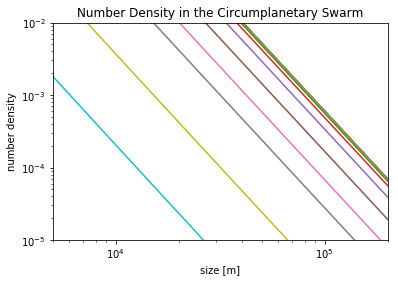

In [10]:
for i in range(len(num_distribution)):
    plt.loglog(drange, num_distribution[i])
plt.xlim([5000, 200000])
plt.ylim([1e-5, 1e-2])
plt.xlabel("size [m]")
plt.ylabel("number density")
plt.title("Number Density in the Circumplanetary Swarm")
plt.show()

# Observable Quantities

## Flux Computations

We now demonstrate the important computations of thermal radiation flux as well as scattering flux produced by both the planet and the circumplanetary swarm. These values are critical, since they are the observable variables. The distance from the solar system, d_pl, used is 10 pc. We take a Jupiter mass planet orbiting an A5 main-sequence star.  

In [2]:
M0 = 10 * 7.34767309e22; Dt = 100.; Dmax = 250000.; L_s = 20 * 3.828e26;
M_s = 1.86 * 1.989e30; M_pl = 1.89587112e27; a_pl = 7.48e12
R_pl = 6.9911e7; eta = 0.4; Nstr = 6.; d_pl = 3.086e17

jupiter5 = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=True)

jupiter5.updateSwarm(1e7) # Update the swarm to 4.5e9 years. 

waverange = logspace(-7, -3, 200)
Fth_planet = jupiter5.computeFth(waverange, planet=True)/1e-26
Fth_swarm = jupiter5.computeFth(waverange, swarm=True)/1e-26
Fs_planet = jupiter5.computeFs(waverange, 1., 0.52, planet=True)/1e-26
Fs_swarm = jupiter5.computeFs(waverange, 0.32, 0.08, swarm=True)/1e-26

C:\Users\loloynage\Documents\CE-Irregular-Satellites\swarms.py:210: RuntimeWarning: overflow encountered in exp
  b = 1/(exp(h*(c/lamb)/(k_B*T)) - 1)


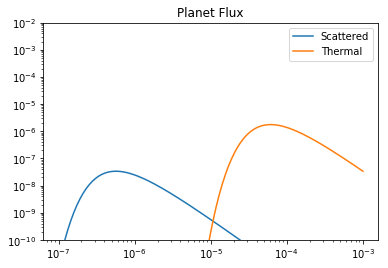

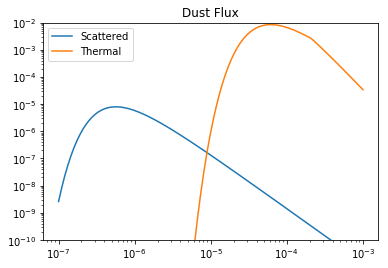

In [3]:
plt.figure(3)
plt.title('Planet Flux')
plt.loglog(waverange, Fs_planet, label="Scattered")
plt.loglog(waverange, Fth_planet, label="Thermal")
plt.ylim([10e-11, 10e-3])
plt.legend()
plt.show()

plt.figure(4)
plt.title('Dust Flux')
plt.loglog(waverange, Fs_swarm, label="Scattered")
plt.loglog(waverange, Fth_swarm, label="Thermal")
plt.ylim([10e-11, 10e-3])
plt.legend()
plt.show()

# Evolution of Debris Population

In [12]:
M0 = 7.37307e19; Dt = 100.; Dmax = 150000.; L_s = 3.828e26;
M_s = 1.989e30; M_pl = 1.89587112e27; a_pl = 7.7792e11
R_pl = 6.9911e7; eta = 0.4; Nstr = 6.; d_pl = a_pl

jupiter6 = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=True)

drange = linspace(0.01, 5e5, 2500)
time_log = logspace(6, 9.5, 10)
total_amount = []


for i in range(len(time_log)):
    jupiter6.updateSwarm(time_log[i])
    num = []
    print(i)
    for j in range(len(drange)):
        num.append(jupiter6.computeNtot(dlow=drange[j]))
    total_amount.append(num)

0
kg_val =  1795511746121.821
lower =  2.6474300034547973e+18
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -35509590.297919
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -40966361.14938644
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41626793.09362134
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41806182.082072064
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41875311.451414235
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41907821.97303168
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41925224.59716147
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41935429.44498162
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41941833.293503776
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41946068.19746001
upper =

kg_val =  1795511746121.821
lower =  -41958929.15133843
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958929.307933934
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958929.46071392
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958929.60979571
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958929.755292274
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958929.897312425
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958930.03596101
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958930.171339035
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958930.3035439
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958930.432669476
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958930.5588063
upper =  53

kg_val =  1795511746121.821
lower =  -41958936.21152335
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958936.22805573
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958936.24436716
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958936.26046138
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958936.27634205
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958936.292012766
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958936.30747703
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958936.32273828
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958936.33779991
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958936.35266519
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958936.367337406
upper =  539

upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.48845702
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.490856
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.49323588
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.49559686
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.497939125
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.50026288
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.502568275
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.50485553
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.50712481
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.509376295
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lowe

qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.73596162
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.73664459
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.737323664
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.737998895
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.73867032
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.739337936
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.7400018
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.740661904
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.74131831
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.74197103
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.74262009
u

lower =  -41958937.81749025
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.81775805
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.81802467
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.81829012
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.8185544
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.81881752
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.81907948
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.819340296
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.81959996
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.81985851
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.82011591
upper =  53947194.33294868
qg =  1.7
kg_va

lower =  -41958937.84354791
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.843707874
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.84386723
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.84402596
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.84418409
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.84434163
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.84449855
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.84465487
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.8448106
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.84496574
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.84512028
upper =  53947194.33294868
qg =  1.7
kg_va

qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.865379795
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.86546241
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.86554475
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.86562684
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.865708664
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.865790226
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.86587153
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.86595256
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.86603333
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.86611386
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.86619412
u

kg_val =  1795511746121.821
lower =  -41958937.87715665
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.87720395
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.877251126
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.87729816
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.87734507
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.877391845
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.8774385
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.87748502
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.87753142
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.87757768
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.87762382
upper =  5394

upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.884168014
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.884197086
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.884226084
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.88425501
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.884283856
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.88431264
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.88434135
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.88437
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.88439857
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.88442708
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lowe

kg_val =  1795511746121.821
lower =  -41958937.88857629
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.88859524
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.88861413
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.888633
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.88865182
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.88867059
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.88868933
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.88870803
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.8887267
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.888745315
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.88876389
upper =  5394719

upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.891524434
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.891537316
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89155017
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.891563
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.891575806
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89158859
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89160135
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89161408
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89162678
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89163947
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lowe

qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89355576
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89356486
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89357395
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.893583015
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89359207
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.893601105
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89361013
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89361913
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89362812
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89363709
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.893646054
u

lower =  -41958937.89501182
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89501844
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89502505
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89503166
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.895038255
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89504483
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.895051405
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89505797
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89506451
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89507105
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89507758
upper =  53947194.33294868
qg =  1.7
kg_

qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89608964
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89609458
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89609951
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89610443
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89610934
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89611425
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.896119155
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89612405
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89612893
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89613382
upper =  53947194.33294868
qg =  1.7
kg_val =  1795511746121.821
lower =  -41958937.89613868
upp

kg_val =  1715944738782.076
lower =  -40099544.65751434
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099544.8109333
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099544.96058937
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099545.106599
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099545.249074325
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099545.388123296
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099545.52384991
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099545.65635437
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099545.7857332
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099545.91207949
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099546.035482936
upper =  515565

upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099552.24184857
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099552.2492858
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099552.25664182
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099552.26391775
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099552.2711147
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099552.27823376
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099552.28527599
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099552.29224244
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099552.299134135
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099552.30595212
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower 

kg_val =  1715944738782.076
lower =  -40099552.8906744
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099552.89212404
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099552.89356349
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099552.89499283
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099552.89641215
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099552.89782154
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099552.899221085
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099552.90061088
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099552.901991
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099552.903361544
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099552.904722586
upper =  51556

lower =  -40099553.049020156
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.04948839
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.0499542
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.050417595
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.050878584
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.0513372
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.05179345
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.05224734
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.05269889
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.05314813
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.05359506
upper =  51556557.33671643
qg =  1.7
kg_v

qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.10700022
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.10719666
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.107392296
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.10758713
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.10778117
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.1079744
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.10816686
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.108358525
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.1085494
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.10873951
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.10892884
uppe

lower =  -40099553.13318514
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.133282736
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.13338
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.13347693
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.13357353
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.13366981
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.13376576
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.13386138
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.13395668
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.13405166
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.13414632
upper =  51556557.33671643
qg =  1.7
kg_val 

qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.146951996
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.14700604
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.14705993
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.147113666
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.14716724
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.147220664
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.147273935
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.14732704
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.14738
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.14743281
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.14748547
upp

kg_val =  1715944738782.076
lower =  -40099553.154845044
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.1548776
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.15491007
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.15494246
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.15497477
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.155007
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.15503914
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.15507121
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.155103184
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.15513509
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.15516691
upper =  515565

upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.15976155
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.15978234
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.1598031
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.1598238
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.15984446
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.159865074
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.15988563
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.159906164
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.15992663
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.15994706
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower

kg_val =  1715944738782.076
lower =  -40099553.162962735
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.162976705
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.16299066
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.16300457
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.163018465
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.16303232
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.16304617
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.16305997
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.16307375
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.1630875
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.163101226
upper =  51

upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.165164
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.16517375
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.16518347
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.16519318
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.16520287
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.165212534
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.1652222
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.16523183
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.16524145
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.165251054
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower 

qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.166715555
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.16672258
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.16672959
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.166736595
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.166743584
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.166750565
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.166757524
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.16676448
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.16677142
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.166778356
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.1667852

lower =  -40099553.167848825
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.167854026
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.16785923
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.167864405
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.16786958
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.16787475
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.16787992
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.167885065
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.16789021
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.167895354
upper =  51556557.33671643
qg =  1.7
kg_val =  1715944738782.076
lower =  -40099553.16790049
upper =  51556557.33671643
qg =  1.7


upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174541.859560505
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174542.92685582
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174543.94920358
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174544.92898118
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174545.868415214
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174546.769592576
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174547.6344707
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174548.464886844
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174549.26256668
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174550.02913223
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667

kg_val =  1547986667822.5781
lower =  -36174574.70802627
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174574.72267044
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174574.737117484
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174574.75137075
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174574.76543353
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174574.779309034
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174574.79300043
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174574.80651082
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174574.81984322
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174574.833000585
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174574.84598585


upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174575.83382947
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174575.83593116
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174575.83801605
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174575.84008431
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174575.84213611
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174575.84417161
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174575.846190974
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174575.848194376
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174575.85018196
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174575.8521539
upper =  46510159.44296272
qg =  1.7
kg_val =  154798666782

kg_val =  1547986667822.5781
lower =  -36174576.050212495
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.050808065
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.051400244
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.051989056
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.052574515
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.05315667
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.053735524
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.054311104
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.05488344
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.055452555
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.0560

lower =  -36174576.12122467
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.121457614
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.12168952
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.12192041
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.12215027
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.122379124
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.12260697
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.12283381
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.12305967
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.123284526
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.123508394
upper =  46510159.44296272
q

qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.15168425
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.15179408
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.15190353
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.15201258
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.15212123
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.1522295
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.15233738
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.15244486
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.15255197
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.152658686
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.15

lower =  -36174576.16687549
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.16693449
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.16699332
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.167051956
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.16711042
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.16716871
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.16722682
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.16728475
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.16734251
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.167400084
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.1674575
upper =  46510159.44296272
qg =

qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.17542511
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.17545969
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.175494164
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.175528556
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.17556285
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.175597064
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.17563117
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.17566521
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.175699145
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.17573299
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -3617457

kg_val =  1547986667822.5781
lower =  -36174576.180577315
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18059904
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18062071
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18064234
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.1806639
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18068542
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.180706896
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18072832
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.180749685
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18077101
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18079228
u

upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18391082
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18392517
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18393948
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18395376
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18396802
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18398225
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.183996454
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18401061
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18402475
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18403887
upper =  46510159.44296272
qg =  1.7
kg_val =  154798666782

kg_val =  1547986667822.5781
lower =  -36174576.186147384
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18615728
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.186167166
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18617702
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.186186865
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.186196685
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18620649
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18621628
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18622605
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.1862358
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18624554


upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18772309
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18773015
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18773719
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18774422
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18775123
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18775824
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18776523
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.187772214
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18777918
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18778614
upper =  46510159.44296272
qg =  1.7
kg_val =  154798666782

qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.188856214
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18886139
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18886656
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18887173
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18887688
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18888203
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.188887164
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.1888923
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.188897416
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.18890253
upper =  46510159.44296272
qg =  1.7
kg_val =  1547986667822.5781
lower =  -36174576.

lower =  -29179957.17471281
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29180099.69319206
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29180220.12997185
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29180322.65542914
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29180410.5218322
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29180486.29204294
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29180552.005104493
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29180609.29770971
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29180659.494386017
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29180703.67520405
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29180742.72713988
upper =  37518632.165406175
qg 

upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181162.152308717
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181162.18355815
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181162.214261815
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181162.244431768
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181162.27407973
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181162.30321712
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181162.331855062
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181162.360004373
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181162.3876756
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181162.414879
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785

kg_val =  1248723785998.023
lower =  -29181164.15810203
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.16105132
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.163973257
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.166868158
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.169736333
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.172578108
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.17539377
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.17818364
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.18094802
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.18368719
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.18640145


upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.44044453
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.441146173
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.441843387
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.442536213
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.443224687
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.443908848
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.444588713
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.445264336
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.44593574
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.446602963
upper =  37518632.165406175
qg =  1.7
kg_val =  1248

kg_val =  1248723785998.023
lower =  -29181164.52077496
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.521026198
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.521276224
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.521525063
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.521772712
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.522019178
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.52226448
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.522508614
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.522751585
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.52299341
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.523234

lower =  -29181164.55267794
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.55279049
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.552902598
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.553014282
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.55312553
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.553236354
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.553346753
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.553456727
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.55356629
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.553675424
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.55378414
upper =  37518632.16540617

qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.568024207
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.56808222
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.568140052
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.568197694
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.56825515
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.568312418
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.568369508
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.568426408
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.568483133
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.568539675
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -2918

lower =  -29181164.576288905
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.57632208
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.57635515
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.57638814
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.576421034
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.576453842
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.576486554
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.576519176
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.57655171
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.576584157
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.57661651
upper =  37518632.16540617

qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.581203397
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.581223756
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.58124407
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.58126433
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.581284545
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.58130471
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.581324827
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.581344895
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.58136491
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.58138488
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -2918116

kg_val =  1248723785998.023
lower =  -29181164.584290452
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.584303714
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.584316947
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.584330153
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.584343325
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.584356472
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.58436959
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.584382676
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.584395733
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.584408768
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.5844

upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.58635351
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.586362526
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.586371515
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.586380493
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.586389452
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.586398393
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.586407315
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.586416222
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.586425114
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.586433988
upper =  37518632.165406175
qg =  1.7
kg_val =  124

kg_val =  1248723785998.023
lower =  -29181164.587774165
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.58778053
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.587786883
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.58779322
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.58779955
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.587805867
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.587812178
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.587818474
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.587824754
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.58783103
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.5878372

upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.588796627
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.588801246
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.588805865
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.588810474
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.588815067
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.58881966
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.58882425
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.588828824
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.588833395
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.58883796
upper =  37518632.165406175
qg =  1.7
kg_val =  12487

qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.589545127
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.589548573
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.58955202
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.589555457
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.589558892
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.58956232
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.589565746
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.58956916
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.589572575
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181164.589575984
upper =  37518632.165406175
qg =  1.7
kg_val =  1248723785998.023
lower =  -29181

lower =  -19806106.90267154
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806106.984392624
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806107.064068675
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806107.141764257
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806107.217541486
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806107.291460134
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806107.363577724
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806107.43394963
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806107.502629183
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806107.56966775
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806107.63511481
upper =  25464994.8569968

upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806110.87657849
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806110.880375665
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806110.88413101
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806110.88784511
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806110.89151853
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806110.89515184
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806110.898745593
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806110.902300335
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806110.905816607
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806110.909294926
upper =  25464994.856996838
qg =  1.7
kg_val =  8475454

kg_val =  847545418182.0923
lower =  -19806111.206136692
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.206868097
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.207594324
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.208315425
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.209031437
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.209742416
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.2104484
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.211149435
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.211845566
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.212536834
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.21322

upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.28605993
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.28629363
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.286526114
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.286757387
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.28698746
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.287216343
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.287444036
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.287670556
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.287895907
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.288120095
upper =  25464994.856996838
qg =  1.7
kg_val =  84754

kg_val =  847545418182.0923
lower =  -19806111.314870335
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.314968567
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.3150664
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.315163832
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.315260857
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.315357488
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.31545372
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.31554956
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.315645006
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.31574006
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.31583472

lower =  -19806111.327951577
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.328000277
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.32804881
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.32809718
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.328145385
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.328193426
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.3282413
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.328289017
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.328336567
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.32838396
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.32843119
upper =  25464994.856996838

qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.334816404
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.334843334
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.33487018
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.334896952
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.334923647
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.334950265
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.334976804
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.335003268
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.33502965
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.335055966
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -1980

lower =  -19806111.338747032
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.338763237
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.338779397
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.338795517
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.338811595
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.338827636
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.338843632
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.33885959
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.338875506
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.33889138
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.33890722
upper =  25464994.856996

qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.341192935
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.341203276
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.34121359
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.34122389
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.34123416
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.34124441
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.341254637
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.341264844
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.341275025
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.34128518
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -1980611

kg_val =  847545418182.0923
lower =  -19806111.342784237
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.342791185
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.342798114
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.34280503
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.342811935
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.342818823
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.342825696
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.342832558
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.342839405
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.34284624
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.34285

upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.3438778
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.34388264
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.343887467
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.343892287
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.3438971
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.343901906
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.3439067
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.343911488
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.343916263
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.34392103
upper =  25464994.856996838
qg =  1.7
kg_val =  8475454181

kg_val =  847545418182.0923
lower =  -19806111.344648194
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.34465168
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.344655164
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.34465864
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.344662108
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.344665572
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.34466903
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.344672482
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.34467593
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.344679367
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.3446828

upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.34521324
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.345215816
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.345218387
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.345220957
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.345223524
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.345226083
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.34522864
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.345231194
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.345233742
upper =  25464994.856996838
qg =  1.7
kg_val =  847545418182.0923
lower =  -19806111.345236287
upper =  25464994.856996838
qg =  1.7
kg_val =  8475

qg =  1.7
kg_val =  474387217649.1186
lower =  -11085843.928670283
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085844.301962156
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085844.658977674
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085845.000607815
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085845.327685088
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085845.640987985
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085845.941245073
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085846.2291387
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085846.505308406
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085846.770354055
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -1108

lower =  -11085855.053325977
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.058001386
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.062613158
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.067162395
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.071650164
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.076077523
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.0804455
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.084755098
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.089007307
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.093203096
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.097343411
upper =  14253239.76568

upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.410206022
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.410865858
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.411520388
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.41216966
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.412813732
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.413452655
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.414086483
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.414715266
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.415339055
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.415957898
upper =  14253239.765688213
qg =  1.7
kg_val =  474

kg_val =  474387217649.1186
lower =  -11085855.477927322
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.478113
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.478297617
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.478481175
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.47866369
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.478845166
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.47902561
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.479205027
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.47938343
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.479560822
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.479737213

upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.500099445
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.500171464
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.500243166
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.50031455
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.50038562
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.500456376
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.500526818
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.500596952
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.500666775
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.500736292
upper =  14253239.765688213
qg =  1.7
kg_val =  4743

kg_val =  474387217649.1186
lower =  -11085855.509475915
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.509509943
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.50954385
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.509577634
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.509611294
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.509644834
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.509678252
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.50971155
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.50974473
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.509777788
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.509810

lower =  -11085855.514178477
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.514196724
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.51421492
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.514233055
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.514251137
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.514269164
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.514287135
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.514305051
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.514322914
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.514340721
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.514358476
upper =  14253239.7656

qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.516821174
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.516831852
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.516842503
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.516853124
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.51686372
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.516874287
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.516884826
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.516895335
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.51690582
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.516916273
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -1108

lower =  -11085855.518411975
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.518418679
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.518425366
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.518432038
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.518438697
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.518445337
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.518451964
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.518458573
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.518465169
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.51847175
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.518478313
upper =  14253239.7656

qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.519440359
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.519444784
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.519449199
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.519453606
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.519458001
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.51946239
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.519466767
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.519471135
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.519475495
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.519479848
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -110

kg_val =  474387217649.1186
lower =  -11085855.520129874
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.520132927
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.520135973
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.52013901
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.520142043
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.520145072
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.520148093
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.52015111
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.52015412
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.520157125
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.520160

kg_val =  474387217649.1186
lower =  -11085855.520470591
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.520473018
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.520475442
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.52047786
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.520480271
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.52048268
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.520485083
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.520487484
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.52048988
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.520492272
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.520494

upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.52086035
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.520862112
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.520863872
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.520865627
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.520867381
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.52086913
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.520870876
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.520872623
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.520874364
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.520876104
upper =  14253239.765688213
qg =  1.7
kg_val =  4743

kg_val =  474387217649.1186
lower =  -11085855.521145597
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.52114691
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.521148225
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.521149533
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.521150842
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.52115215
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.521153454
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.521154756
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.521156058
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.521157354
upper =  14253239.765688213
qg =  1.7
kg_val =  474387217649.1186
lower =  -11085855.52115

lower =  -5479857.235364964
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479857.259163253
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479857.282357831
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479857.304968023
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479857.327012405
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479857.34850884
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479857.369474515
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479857.389925967
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479857.409879111
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479857.429349268
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479857.448351192
upper =  7045530.768403757
qg =  

qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.379702519
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.380776747
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.38183907
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.382889654
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.383928664
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.384956263
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.385972607
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.386977853
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.387972156
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.388955665
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.3899

kg_val =  234494742191.24252
lower =  -5479858.472610558
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.472815823
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.47301963
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.47322199
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.473422919
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.47362243
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.473820534
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.474017243
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.474212571
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.47440653
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.474599132
upper =

upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.495002067
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.4950674055
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.4951324025
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.4951970605
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.495261383
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.495325371
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.495389027
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.495452352
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.495515349
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.495578023
upper =  7045530.768403757
qg =  1.7
kg_val =  2344947421

kg_val =  234494742191.24252
lower =  -5479858.503048826
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.503076232
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.503103524
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.503130703
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.503157771
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.503184727
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.503211572
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.503238307
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.503264932
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.503291449
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.503317856
upp

upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.506709258
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.506722778
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.506736253
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.506749681
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.506763063
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.5067764
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.506789692
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.506802938
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.506816139
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.506829296
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24

qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.50860714
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.508614633
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.508622105
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.508629556
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.508636984
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.508644391
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.508651777
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.508659141
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.508666485
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.508673806
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.5086

lower =  -5479858.509700614
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.50970512
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.5097096125
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.509714096
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.509718567
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.509723026
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.509727476
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.509731913
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.50973634
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.509740755
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.509745158
upper =  7045530.768403757
qg =  

qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.51038059
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.510383464
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.510386333
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.510389194
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.510392048
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.510394897
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.510397739
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.510400576
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.510403404
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.510406228
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.5104

lower =  -5479858.5108227525
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.510824682
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.510826607
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.510828529
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.510830447
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.51083236
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.51083427
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.510836176
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.510838077
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.510839975
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.510841871
upper =  7045530.768403757
qg =  

upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.511126484
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.511127828
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.511129169
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.511130507
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.511131844
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.511133177
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.511134509
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.511135838
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.511137165
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.5111384895
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191

kg_val =  234494742191.24252
lower =  -5479858.5113403825
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.51134135
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.511342317
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.511343283
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.511344246
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.511345207
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.511346167
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.511347125
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.511348083
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.511349037
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.511349991
upp

upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.511497221
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.511497936
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.511498651
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.511499364
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.511500075
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.511500787
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.511501497
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.511502204
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.511502912
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.24252
lower =  -5479858.511503619
upper =  7045530.768403757
qg =  1.7
kg_val =  234494742191.

qg =  1.7
kg_val =  135006342541.04483
lower =  -3154931.4129859563
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154931.529320015
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154931.6404592274
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154931.7466947427
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154931.8482981534
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154931.945523024
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154932.038606279
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154932.12776947
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154932.2132199416
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154932.295151883
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154932

lower =  -3154934.8037195797
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.805087341
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.806436348
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.8077669274
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.809079396
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.810374068
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.811651247
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.812911234
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.8141543204
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.8153807935
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.816590934
upper =  4056342.797478337
q

qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9076210405
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.907811893
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.908001204
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9081889875
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.908375261
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9085600376
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9087433354
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.908925167
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9091055486
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9092844944
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -31549

kg_val =  135006342541.04483
lower =  -3154934.9271674785
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9272209317
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.927274078
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9273269204
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9273794605
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9274317
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.927483642
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.927535288
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9275866407
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.927637702
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.927688473


upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9335427964
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.933563477
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.933584065
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9336045613
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.933624967
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9336452824
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9336655084
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9336856445
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9337056917
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.933725651
upper =  4056342.797478337
qg =  1.7
kg_val =  1350063

kg_val =  135006342541.04483
lower =  -3154934.9362330497
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.936242805
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9362525246
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.936262209
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.936271858
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9362814724
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.936291052
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9363005976
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.936310108
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.936319584
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.936329026

upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9375856216
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9375908314
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9375960245
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9376012026
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9376063636
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9376115096
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9376166402
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9376217546
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.937626853
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9376319367
upper =  4056342.797478337
qg =  1.7
kg_val =  1350

qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.938336816
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.938339872
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.938342919
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.938345958
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9383489895
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.938352012
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.938355027
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9383580345
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.938361034
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9383640247
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.

lower =  -3154934.9387918175
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9387937346
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.938795647
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.938797555
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9387994576
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9388013566
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.938803252
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9388051415
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9388070274
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.938808908
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9388107853
upper =  4056342.79747833

lower =  -3154934.939000482
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9390019285
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.939003371
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.939004811
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9390062476
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9390076813
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.939009112
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9390105396
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.939011964
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9390133847
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.939014803
upper =  4056342.797478337


qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9392253794
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9392263615
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9392273417
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9392283196
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9392292956
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.93923027
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9392312425
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.939232213
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9392331815
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9392341482
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154

kg_val =  135006342541.04483
lower =  -3154934.9393801265
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.939380819
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9393815105
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9393822015
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9393828907
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.939383579
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9393842653
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.939384951
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.939385635
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.939386318
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.939387
u

upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9394914275
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.93949193
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9394924324
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.939492934
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9394934345
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9394939337
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9394944333
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.939494931
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.939495428
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.939495925
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342

kg_val =  135006342541.04483
lower =  -3154934.9395728614
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9395732367
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.939573611
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.939573985
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.939574359
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9395747315
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.939575104
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9395754756
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9395758472
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9395762174
upper =  4056342.797478337
qg =  1.7
kg_val =  135006342541.04483
lower =  -3154934.9395765

lower =  -662247.4003441526
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.403373509
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.406324949
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.409201001
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.412004094
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.4147365632
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.4174006536
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.4199985239
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.4225322512
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.4250038341
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.4274151957
upper =  851459.7426380336
qg =  1.7
kg_val = 

qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5443554906
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5444882519
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.544619533
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5447493548
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5448777379
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5450047022
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5451302679
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5452544545
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5453772808
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5454987661
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5456189287
upper

lower =  -662247.5557974346
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5558225984
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5558475826
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.555872389
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5558970193
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5559214749
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5559457574
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5559698686
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5559938095
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5560175821
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5560411877
upper =  851459.7426380336
qg =  1.7
kg_val

upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5585377064
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5585456858
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5585536236
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5585615198
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5585693747
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5585771889
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5585849623
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5585926953
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5586003881
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5586080411
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower

kg_val =  28338974565.02719
lower =  -662247.5595194191
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5595227587
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5595260842
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5595293964
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5595326946
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5595359792
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5595392503
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5595425081
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5595457522
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5595489832
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.559552201
upper =  851459

upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5599651672
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5599668124
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.559968452
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5599700859
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5599717143
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.559973337
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5599749543
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5599765661
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5599781724
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5599797732
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =

kg_val =  28338974565.02719
lower =  -662247.5601959939
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5601969048
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5601978132
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5601987188
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5601996218
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5602005222
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5602014199
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5602023151
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5602032077
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5602040977
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5602049851
upper =  85145

lower =  -662247.5603288676
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5603294149
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5603299609
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5603305054
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5603310484
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5603315901
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5603321305
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5603326695
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5603332071
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5603337435
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5603342783
upper =  851459.7426380336
qg =  1.7
kg_va

qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5604114397
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5604117888
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5604121368
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5604124842
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5604128308
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5604131767
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5604135216
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.560413866
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5604142093
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5604145521
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5604148939
upper

lower =  -662247.560465105
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5604653391
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5604655728
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5604658059
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5604660385
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5604662708
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5604665026
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5604667338
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5604669645
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5604671949
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5604674247
upper =  851459.7426380336
qg =  1.7
kg_val

qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5605019534
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5605021163
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.560502279
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5605024415
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5605026034
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5605027652
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5605029267
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5605030879
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5605032488
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5605034095
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5605035698
upper

kg_val =  28338974565.02719
lower =  -662247.5605278943
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5605280116
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5605281289
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5605282459
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5605283626
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5605284793
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5605285957
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.560528712
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.560528828
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5605289438
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5605290594
upper =  851459.

upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5605469098
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5605469965
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.560547083
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5605471694
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5605472558
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5605473421
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.560547428
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5605475139
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5605475998
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =  -662247.5605476853
upper =  851459.7426380336
qg =  1.7
kg_val =  28338974565.02719
lower =

qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.07354473241
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.07740168496
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.08108214736
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.08459625277
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.08795343734
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.09116249584
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.09423163225
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.097168506
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.0999802739
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.10267362834
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.10525483

lower =  -95301.18342173906
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18346421837
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18350611087
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18354742687
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18358817634
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.1836283692
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18366801496
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18370712314
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18374570293
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18378376336
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18382131332
upper =  122529.3077483827
qg =  

qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18663299264
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18663885238
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18664466453
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18665042962
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18665614814
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18666182052
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18666744728
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18667302885
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18667856572
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18668405831
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18668

lower =  -95301.18723184681
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.1872334802
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18723510421
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18723671888
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18723832426
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18723992047
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18724150755
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18724308556
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18724465457
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18724621464
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18724776586
upper =  122529.3077483827
qg =  

upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18742642585
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18742705611
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18742768357
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18742830826
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18742893018
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.1874295493
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.1874301657
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18743077938
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18743139034
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.1874319986
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.30080

kg_val =  4078139494.3008046
lower =  -95301.18750835555
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18750865237
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18750894812
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18750924278
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.1875095364
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18750982892
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.1875101204
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18751041082
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.1875107002
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18751098853
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18751127581
upper 

upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18754948911
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18754964744
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18754980528
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18754996266
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18755011952
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18755027594
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18755043185
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18755058729
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18755074225
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18755089675
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.30

kg_val =  4078139494.3008046
lower =  -95301.18757231132
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.1875724041
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18757249662
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18757258893
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18757268098
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18757277277
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18757286435
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18757295565
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18757304674
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18757313758
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18757322818
uppe

lower =  -95301.18758612467
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18758618283
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18758624086
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18758629878
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18758635655
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18758641418
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18758647166
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18758652902
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18758658627
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18758664334
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18758670031
upper =  122529.3077483827
qg = 

qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18759504426
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18759508264
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.1875951209
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18759515909
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18759519719
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18759523523
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.1875952732
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18759531107
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18759534886
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18759538658
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.1875954

lower =  -95301.18760101932
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760104575
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760107212
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760109844
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760112472
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760115096
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760117714
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760120326
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760122932
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760125537
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760128134
upper =  122529.3077483827
qg = 

qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760522346
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760524229
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760526106
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760527979
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.1876052985
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760531719
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760533581
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760535443
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760537302
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760539156
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.187605

kg_val =  4078139494.3008046
lower =  -95301.18760824352
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760825731
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760827108
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760828483
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760829855
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760831226
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760832596
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760833962
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760835327
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760836689
upper =  122529.3077483827
qg =  1.7
kg_val =  4078139494.3008046
lower =  -95301.18760838048
upp

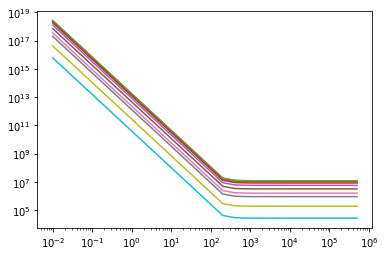

In [13]:
for i in range(len(total_amount)):
    plt.loglog(drange, total_amount[i])

plt.show()